# About this data
### Source: https://www.kaggle.com/loveall/clicks-conversion-tracking

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [4]:
#importing libraries

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# reading the file

dataset= pd.read_csv('../input/clicks-conversion-tracking/KAG_conversion_data.csv')

# Data Exploration

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [7]:
dataset.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ad_id,1143.0,987261.130359,193992.814738,708746.0,777632.50,1121185.00,1121804.500,1.314415e+06
xyz_campaign_id,1143.0,1067.382327,121.629393,916.0,936.00,1178.00,1178.000,1.178000e+03
fb_campaign_id,1143.0,133783.989501,20500.308622,103916.0,115716.00,144549.00,144657.500,1.799820e+05
interest,1143.0,32.766404,26.952131,2.0,16.00,25.00,31.000,1.140000e+02
Impressions,1143.0,186732.132983,312762.183208,87.0,6503.50,51509.00,221769.000,3.052003e+06
Clicks,1143.0,33.390201,56.892438,0.0,1.00,8.00,37.500,4.210000e+02
Spent,1143.0,51.360656,86.908418,0.0,1.48,12.37,60.025,6.399500e+02
Total_Conversion,1143.0,2.855643,4.483593,0.0,1.00,1.00,3.000,6.000000e+01
Approved_Conversion,1143.0,0.944007,1.737708,0.0,0.00,1.00,1.000,2.100000e+01


### Separating 'Categorical' and 'Numerical' columns 

#### a) Categorical 

In [9]:
categorical_features=[ x for x in dataset.columns if dataset[x].dtype == 'O']
categorical_features

['age', 'gender']

There are only 2 categorical columns namely, age and gender.

In [10]:
#finding count of different elements in the column

for x in categorical_features:
    abc = dataset[x].value_counts()
    print(abc)

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64
M    592
F    551
Name: gender, dtype: int64


Plotting the categorical variable to check the count of each element in it.

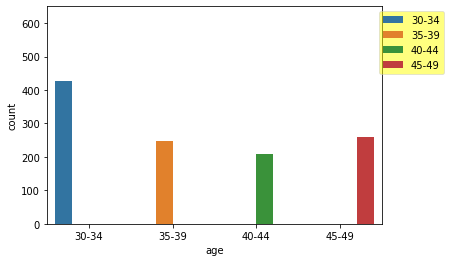

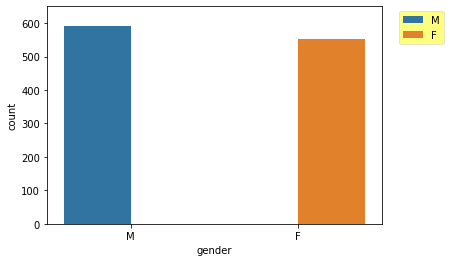

In [11]:
for i in categorical_features:
    sns.countplot(dataset[i], hue= dataset[i])
    plt.ylim(0,650)
    plt.legend(loc='upper right', facecolor='yellow', framealpha=0.5, bbox_to_anchor=(1.2,1))
    plt.show()

In [12]:
categorical_features_with_nan = [x for x in categorical_features if dataset[x].isnull().sum()>0]
categorical_features_with_nan

[]

The 'categorical_features_with_nan' list shows that there is null value present in the categorical columns.

#### b) Numerical

In [13]:
numerical_features = [x for x in dataset.columns if x not in categorical_features]
numerical_features

['ad_id',
 'xyz_campaign_id',
 'fb_campaign_id',
 'interest',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion']

In [14]:
numerical_features_with_nan = [x for x in numerical_features if dataset[x].isnull().sum()>0]
numerical_features_with_nan

[]

The 'numerical_features_with_nan' list shows that there is null value present in the categorical columns.

From the above codes, we can conclude that this data has 'NO NULL' value.

## DATA VISUALISATION

<Figure size 792x720 with 0 Axes>

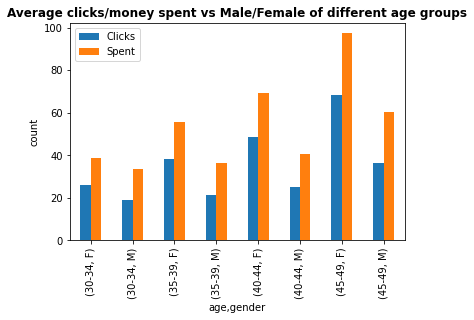

In [15]:
fig= plt.figure(figsize=(11,10))

dataset.groupby(categorical_features)['Clicks','Spent'].mean().plot.bar()
plt.title('Average clicks/money spent vs Male/Female of different age groups', fontweight="bold")
plt.ylabel('count')

plt.show()

From the above graph, we can depict that females of every age clicked on the Ads the most compared to men of same age group. 

And money was also spent more on females of every age group.

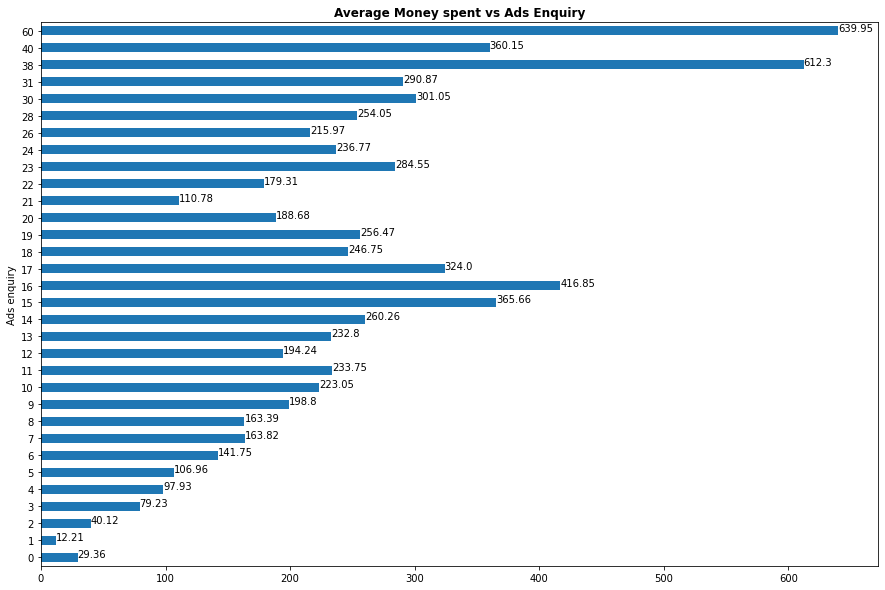

In [16]:
fig= plt.figure(figsize=(15,10))

dataset.groupby('Total_Conversion')['Spent'].mean().plot.barh()
plt.title('Average Money spent vs Ads Enquiry', fontweight="bold")
plt.ylabel('Ads enquiry')

abc= round(dataset.groupby('Total_Conversion')['Spent'].mean(),2)

for index, value in enumerate(abc):
    plt.text(value, index, str(value))       

#### Insights from above graph:

When the company spent an average of 

1) $10-200 on Ads, then, they got 120 Ads enquiry in return.

2) $200-400 on Ads, then, they got 319 Ads enquiry in return.

3) > $400 on Ads, then, they got 114 Ads enquiry in return.

We can conclude that spending between $200-400 on Ads seems reasonable for any company because it yields the max Ads enquiry.

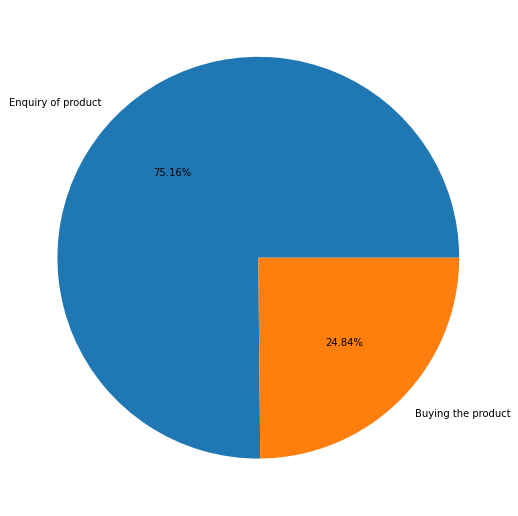

In [17]:
fig= plt.figure(figsize=(9,10))

value=[dataset['Total_Conversion'].mean(), dataset['Approved_Conversion'].mean()]
labels= ['Enquiry of product', 'Buying the product']
plt.pie(value, labels = labels, autopct='%.2f%%')

plt.show()

Around 3/4th of the people only enquires about the products seen via ads but only 1/4th people buys it.

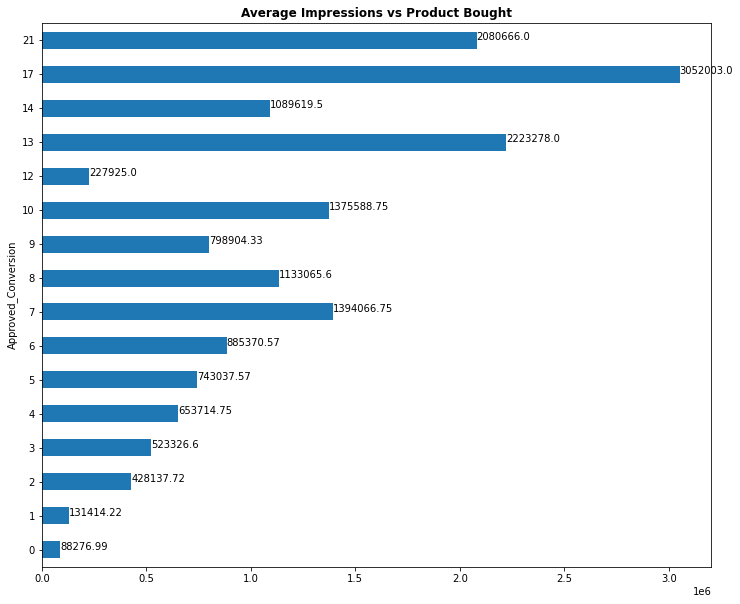

In [18]:
fig= plt.figure(figsize=(12,10))

dataset.groupby(['Approved_Conversion'])['Impressions'].mean().plot.barh()
xyz=round(dataset.groupby(['Approved_Conversion'])['Impressions'].mean(),2)
plt.title('Average Impressions vs Product Bought', fontweight="bold")

#to put the value above the bar
for index, value in enumerate(xyz):
    plt.text(value, index, str(value))

#### Insights:
When the ads were shown more than 1300000 times, a total of 68 products were bought by the people, and,

64 products were sold when the Impressions were less than 1300000.

i.e. More impression implies more publicity and thus more people will buy it.

#### Separating data in 2 parts(men and women)
 

In [19]:
women= dataset[dataset['gender']=='F']
men= dataset[dataset['gender']=='M']

men_abv_avg_Impression = men[men['Impressions']>dataset['Impressions'].mean()]
women_abv_avg_Impression = women[women['Impressions']>dataset['Impressions'].mean()]

men_below_avg_Impression = men[men['Impressions']<dataset['Impressions'].mean()]
women_below_avg_Impression = women[women['Impressions']<dataset['Impressions'].mean()]

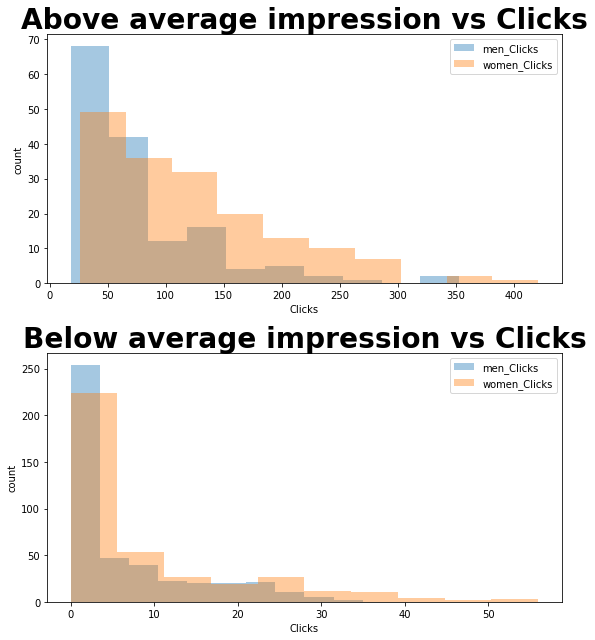

In [20]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,9))

sns.distplot(men_abv_avg_Impression.Clicks, bins=10, kde= False, label= 'men_Clicks', ax= ax1)
sns.distplot(women_abv_avg_Impression.Clicks, bins=10, kde= False, label= 'women_Clicks', ax= ax1)
ax1.legend()
ax1.set_ylabel('count')
ax1.set_title('Above average impression vs Clicks', fontweight="bold", fontname="Times New Roman", size=28)

sns.distplot(men_below_avg_Impression.Clicks, bins=10, kde= False, label= 'men_Clicks', ax= ax2)
sns.distplot(women_below_avg_Impression.Clicks, bins=10, kde= False, label= 'women_Clicks', ax= ax2)
ax2.set_ylabel('count')
ax2.set_title('Below average impression vs Clicks', fontweight="bold", fontname="Times New Roman", size=28)
ax2.legend()

plt.tight_layout()
plt.show()

When women were shown ads more than the above average amount, they tend to click on it more often than men, 
who were shown the same amount of ads.

When women were shown ads less than the above average amount, then number of clicks fell drastically for both men and women, but women still clicked more than men did.

In [21]:
#removig the 'id' columns from the dataset
numerical_features_new = [x for x in numerical_features if '_id' not in x]
numerical_features_new

['interest',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion']

#### Giving numerical value to the categorical values by using LabelEncoder


In [22]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for x in categorical_features:
    dataset[x]= le.fit_transform(dataset[x])
    print(x, le.classes_)

age ['30-34' '35-39' '40-44' '45-49']
gender ['F' 'M']


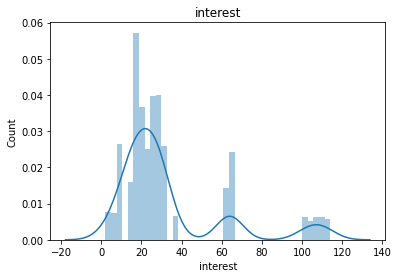

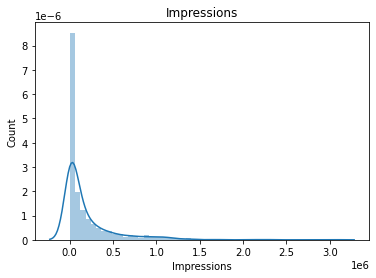

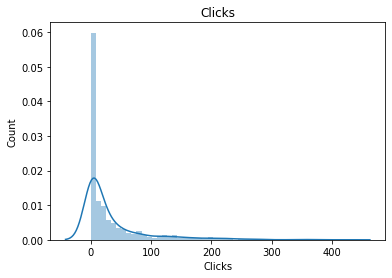

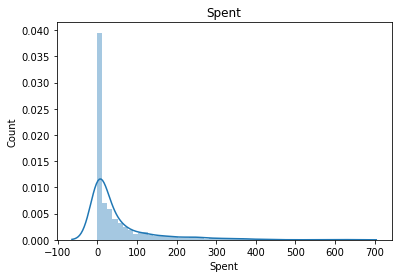

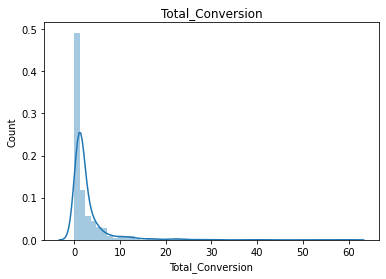

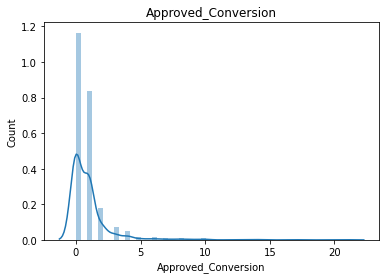

In [23]:
for i in numerical_features_new:
    sns.distplot(dataset[i])
    plt.title(i)
    plt.ylabel('Count')
    plt.show()

#### Bringing down all the values to same scale(between 0 to 1)

In [24]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
dataset_scaled = pd.DataFrame(scale.fit_transform(dataset) ,columns = dataset.columns)

#### Finding the Correlation

<AxesSubplot:>

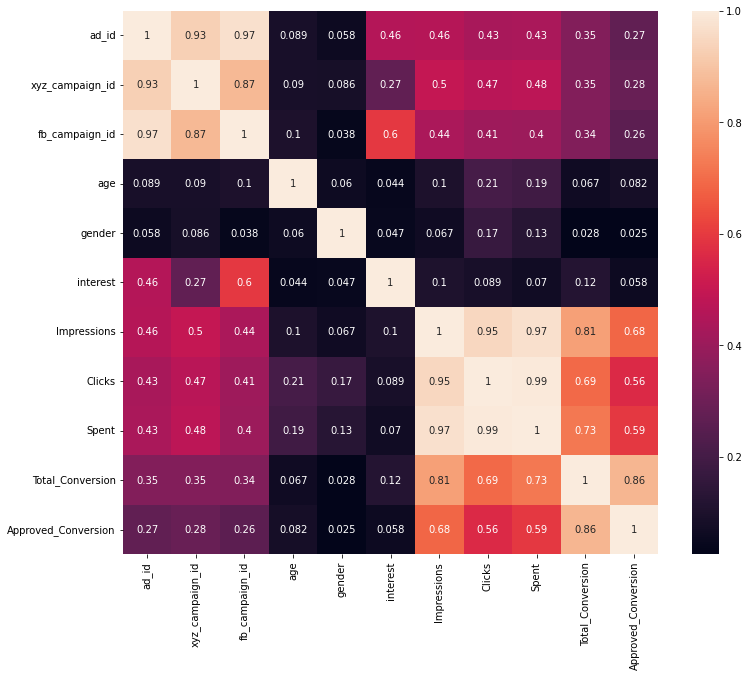

In [25]:
fig= plt.figure(figsize=(12,10))

sns.heatmap(dataset_scaled.corr().abs() , annot= True)

### Keeping only the related columns

In [26]:
data= dataset_scaled.copy()
data= data[['Impressions', 'Clicks', 'Spent']]

## Applying algorithm (kmeans)

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia= []
k= np.arange(1,9)
for i in k:
    model = KMeans(n_clusters= i, max_iter=5)
    ab = model.fit(data.values)
    inertia.append(pd.Series({'k': i,
                              'inertia': model.inertia_
                             }))

In [28]:
inertias= pd.concat(inertia, axis=1).T.set_index('k')
inertias

,inertia
k,
1.0,3429.000000
2.0,996.484579
3.0,542.249764
4.0,352.446038
5.0,260.568962
6.0,186.885497
7.0,149.672992
8.0,126.234687


Lesser the inertia better the result.

But, we can see the drop in inertia from k=1 to k=2 and k=2 to k=3 is much greater.

Though, inertia decreases with increase in k, but the rate is very low.

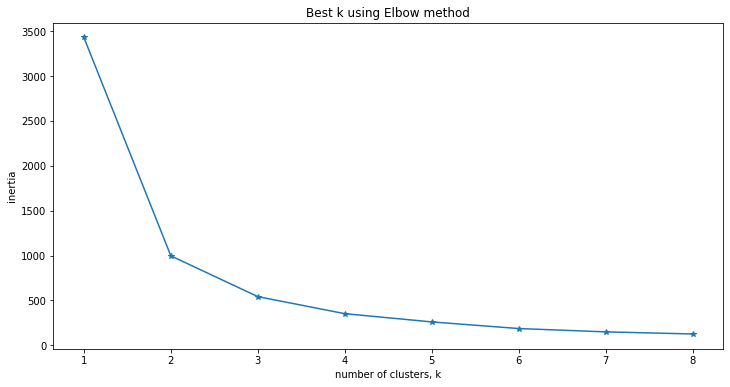

In [29]:
# Plot k vs inertias

plt.figure(figsize=(12,6))
plt.plot(inertias.index, inertias['inertia'], '-*')
plt.title('Best k using Elbow method')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k)
plt.show()

From the above elbow graph, we can see that for k=2, inertia drops with a high rate, so, we can choose k=2 or k=3 (to be on the safe side).

In [30]:
score=[]
k= np.arange(2,9)
for i in k:
    model = KMeans(n_clusters= i, max_iter=5)
    pred = model.fit_predict(data.values)
    sil_score= silhouette_score(data.values, pred)
    score.append(pd.Series({'k': i,
                            'Score': sil_score
                             }))

In [31]:
result= pd.concat(score, axis=1).T.set_index('k')
result

,Score
k,
2.0,0.792779
3.0,0.711813
4.0,0.689029
5.0,0.657339
6.0,0.653808
7.0,0.626442
8.0,0.625331


From the above table, it is clear that k=2 i.e. , two yields the best result so we'll choose it.

In [32]:
model = KMeans(n_clusters= 2, max_iter=5)
model.fit(data.values)

KMeans(max_iter=5, n_clusters=2)

In [33]:
data['Score']= model.predict(data.values)
data.sample(5)

,Impressions,Clicks,Spent,Score
964,-0.155388,0.028308,-0.027865,0
811,-0.123861,-0.165124,-0.108100,0
220,-0.544764,-0.569573,-0.573390,0
164,-0.591987,-0.587157,-0.591233,0
54,-0.591635,-0.587157,-0.591233,0


A Silhouette score of :

1) -1 shows BAD CLUSTERING,

2) 0 shows CLUSTERS ARE OVERLAPPED,

3) 1 or >1 shows GOOD CLUSTERING.

### Visualisation of the result

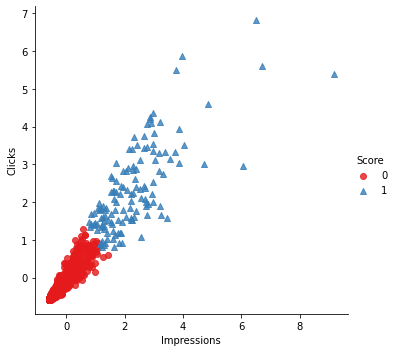

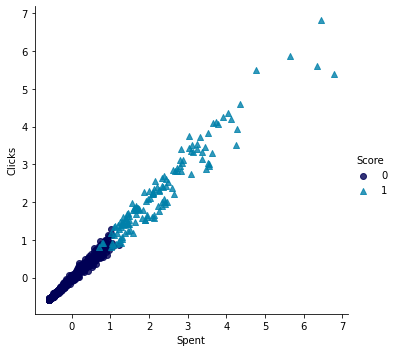

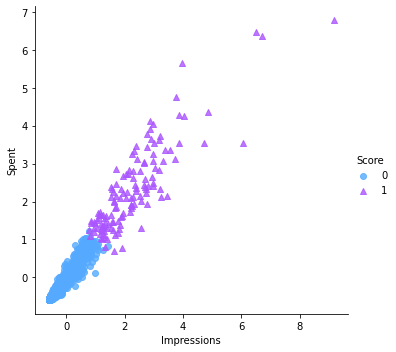

In [36]:
sns.lmplot(x='Impressions', y='Clicks', data= data, hue='Score',fit_reg=False, markers=["o", "^"] ,palette='Set1')
sns.lmplot(x='Spent', y='Clicks', data= data, hue='Score',fit_reg=False, markers=["o", "^"], palette="ocean" )
sns.lmplot(x='Impressions', y='Spent', data= data, hue='Score',fit_reg=False, markers=["o", "^"] ,palette="cool" )
plt.show()